In [1]:
# import the libraries
import pandas as pd
import numpy as np

In [10]:
#read the dataset and check the first five rows
inp0 =pd.read_csv("C:/Users/HP/OneDrive/Desktop/study/PANDAS/My Uber Drives - 2016.csv")

# Step 1: Understnding the dataset

In [11]:
# checking first five rows of the dataset
inp0.head()

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*
0,01-01-2016 21:11,01-01-2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,01-02-2016 01:25,01-02-2016 01:37,Business,Fort Pierce,Fort Pierce,5.0,NaN
2,01-02-2016 20:25,01-02-2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,01-05-2016 17:31,01-05-2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,01-06-2016 14:42,01-06-2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit


In [12]:
# check the shape of the dataframe
inp0.shape

(1156, 7)

In [13]:
# summary of the dataset
inp0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1156 entries, 0 to 1155
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   START_DATE*  1156 non-null   object 
 1   END_DATE*    1140 non-null   object 
 2   CATEGORY*    1148 non-null   object 
 3   START*       1152 non-null   object 
 4   STOP*        1152 non-null   object 
 5   MILES*       1148 non-null   float64
 6   PURPOSE*     648 non-null    object 
dtypes: float64(1), object(6)
memory usage: 63.3+ KB


In [14]:
# statistical summary
inp0.describe()

,MILES*
count,1148.00000
mean,21.21899
std,360.54760
min,0.50000
25%,2.87500
50%,6.00000
75%,10.42500
max,12204.70000


## Observations

- 1.Total No. Rows are 1156 & Columns are 7.
- 2.The Columns has null values are END_DATE*, CATEGORY*, START*, STOP*, MILES*, PURPOSE* except START_DATE* 



# Step 2 : Data Handling Cleaning

In [15]:
# To check the count of missing values in each column
inp0.isnull().sum()

START_DATE*      0
END_DATE*       16
CATEGORY*        8
START*           4
STOP*            4
MILES*           8
PURPOSE*       508
dtype: int64

In [16]:
# To check the percentage of missing values in each column
(inp0.isnull().sum() / len(inp0))*100

START_DATE*     0.000000
END_DATE*       1.384083
CATEGORY*       0.692042
START*          0.346021
STOP*           0.346021
MILES*          0.692042
PURPOSE*       43.944637
dtype: float64

In [17]:
# check the number of null values in the columns
inp0.isnull().sum()

START_DATE*      0
END_DATE*       16
CATEGORY*        8
START*           4
STOP*            4
MILES*           8
PURPOSE*       508
dtype: int64

### Handling missing values for END_DATE*

In [18]:
inp0[~inp0['END_DATE*'].isnull()]

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*
0,01-01-2016 21:11,01-01-2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,01-02-2016 01:25,01-02-2016 01:37,Business,Fort Pierce,Fort Pierce,5.0,NaN
2,01-02-2016 20:25,01-02-2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,01-05-2016 17:31,01-05-2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,01-06-2016 14:42,01-06-2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit
...,...,...,...,...,...,...,...
1150,12/31/2016 1:07,12/31/2016 1:14,Business,Kar?chi,Kar?chi,0.7,Meeting
1151,12/31/2016 13:24,12/31/2016 13:42,NaN,Kar?chi,Unknown Location,3.9,Temporary Site
1152,12/31/2016 15:03,12/31/2016 15:38,Business,Unknown Location,Unknown Location,16.2,Meeting
1153,12/31/2016 21:32,12/31/2016 21:50,Business,Katunayake,Gampaha,6.4,Temporary Site


In [19]:
#Drop the rows having null values in rating field
inp1 = inp0[~inp0['END_DATE*'].isnull()]

# Check the shape of the dataframe
inp1.shape

(1140, 7)

In [20]:
#Check the number of nulls in the Rating field again to cross-verify
inp1['END_DATE*'].isnull().sum()

0

In [21]:
# Check the number of nulls in the dataframe again and find the total number of null values
inp1.isnull().sum()

START_DATE*      0
END_DATE*        0
CATEGORY*        7
START*           3
STOP*            3
MILES*           8
PURPOSE*       507
dtype: int64

In [22]:
#Inspect the nulls in the Android Version column
inp1[inp1['CATEGORY*'].isnull()]

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*
25,1/14/2016 16:29,1/14/2016 17:05,NaN,Houston,Houston,21.9,Customer Visit
37,1/21/2016 14:25,1/21/2016 14:29,NaN,Cary,Cary,1.6,Errand/Supplies
38,1/21/2016 14:43,1/21/2016 14:51,NaN,Cary,Cary,2.4,Meal/Entertain
1145,12/30/2016 10:15,12/30/2016 10:33,NaN,Kar?chi,Kar?chi,2.8,Errand/Supplies
1149,12/30/2016 23:06,12/30/2016 23:10,NaN,Kar?chi,Kar?chi,0.8,Customer Visit
1151,12/31/2016 13:24,12/31/2016 13:42,NaN,Kar?chi,Unknown Location,3.9,Temporary Site
1154,12/31/2016 22:08,12/31/2016 23:51,NaN,Gampaha,Ilukwatta,48.2,Temporary Site


In [23]:
#Check the most common value in the Android version column
inp1['CATEGORY*'].value_counts()

Business    1056
Personal      77
Name: CATEGORY*, dtype: int64

In [24]:
#Fill up the nulls in the column with the above value
inp1['CATEGORY*'] = inp1['CATEGORY*'].fillna(inp1['CATEGORY*'].mode()[0])

C:\Users\HP\AppData\Local\Temp/ipykernel_23004/1351060751.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  inp1['CATEGORY*'] = inp1['CATEGORY*'].fillna(inp1['CATEGORY*'].mode()[0])


In [25]:
#Check the nulls in the column again to cross-verify
inp1['CATEGORY*'].isnull().sum()

0

In [26]:
inp1.isnull().sum()

START_DATE*      0
END_DATE*        0
CATEGORY*        0
START*           3
STOP*            3
MILES*           8
PURPOSE*       507
dtype: int64

In [27]:
inp1[inp1['START*'].isnull()]

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*
11,01-10-2016 18:18,01-10-2016 18:53,Business,NaN,New York,7.5,Meeting
18,01-12-2016 12:53,01-12-2016 13:09,Business,NaN,Lower Manhattan,4.0,Meal/Entertain
34,1/20/2016 10:36,1/20/2016 11:11,Business,NaN,Raleigh,17.1,Meeting


In [29]:
inp1['START*'] = inp1['START*'].fillna(inp1['START*'].mode()[0])

C:\Users\HP\AppData\Local\Temp/ipykernel_23004/3909076987.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  inp1['START*'] = inp1['START*'].fillna(inp1['START*'].mode()[0])


In [30]:
#Check the nulls in the column again to cross-verify
inp1['START*'].isnull().sum()

0

In [31]:
inp1.isnull().sum()

START_DATE*      0
END_DATE*        0
CATEGORY*        0
START*           0
STOP*            3
MILES*           8
PURPOSE*       507
dtype: int64

In [32]:
inp1[inp1['STOP*'].isnull()]

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*
20,01-12-2016 15:13,01-12-2016 15:28,Business,Hudson Square,NaN,2.4,Customer Visit
28,1/15/2016 11:43,1/15/2016 12:03,Business,Cary,NaN,10.4,Meal/Entertain
40,1/26/2016 10:41,1/26/2016 10:50,Business,Whitebridge,NaN,2.0,Meal/Entertain


In [33]:
inp1['STOP*'] = inp1['STOP*'].fillna(inp1['STOP*'].mode()[0])

C:\Users\HP\AppData\Local\Temp/ipykernel_23004/1748641168.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  inp1['STOP*'] = inp1['STOP*'].fillna(inp1['STOP*'].mode()[0])


In [34]:
#Check the nulls in the column again to cross-verify
inp1['STOP*'].isnull().sum()

0

In [35]:
inp1.isnull().sum()

START_DATE*      0
END_DATE*        0
CATEGORY*        0
START*           0
STOP*            0
MILES*           8
PURPOSE*       507
dtype: int64

In [36]:
inp1[inp1['PURPOSE*'].isnull()]

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*
1,01-02-2016 01:25,01-02-2016 01:37,Business,Fort Pierce,Fort Pierce,5.0,NaN
32,1/19/2016 9:09,1/19/2016 9:23,Business,Whitebridge,Lake Wellingborough,7.2,NaN
85,02-09-2016 10:54,02-09-2016 11:07,Personal,Whitebridge,Northwoods,5.3,NaN
86,02-09-2016 11:43,02-09-2016 11:50,Personal,Northwoods,Tanglewood,3.0,NaN
87,02-09-2016 13:36,02-09-2016 13:52,Personal,Tanglewood,Preston,5.1,NaN
...,...,...,...,...,...,...,...
1105,12/24/2016 10:34,12/24/2016 10:53,Business,Lahore,Lahore,5.3,NaN
1107,12/24/2016 13:08,12/24/2016 13:29,Business,Lahore,Lahore,3.6,NaN
1109,12/24/2016 19:12,12/24/2016 19:27,Business,Lahore,Lahore,2.9,NaN
1112,12/25/2016 19:15,12/25/2016 19:26,Business,Lahore,Lahore,2.3,NaN


In [37]:
inp1['PURPOSE*'] = inp1['PURPOSE*'].fillna(inp1['PURPOSE*'].mode()[0])

C:\Users\HP\AppData\Local\Temp/ipykernel_23004/3282937735.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  inp1['PURPOSE*'] = inp1['PURPOSE*'].fillna(inp1['PURPOSE*'].mode()[0])


In [38]:
#Check the nulls in the column again to cross-verify
inp1['PURPOSE*'].isnull().sum()

0

In [39]:
inp1.isnull().sum()

START_DATE*    0
END_DATE*      0
CATEGORY*      0
START*         0
STOP*          0
MILES*         8
PURPOSE*       0
dtype: int64

In [40]:
inp1[inp1['MILES*'].isnull()]

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*
1124,12/27/2016 19:19,12/27/2016 19:50,Business,Kar?chi,Kar?chi,NaN,Customer Visit
1125,12/28/2016 8:34,12/28/2016 9:06,Business,Kar?chi,Unknown Location,NaN,Meal/Entertain
1126,12/28/2016 11:42,12/28/2016 12:12,Business,Unknown Location,Kar?chi,NaN,Errand/Supplies
1127,12/28/2016 13:53,12/28/2016 14:01,Business,Kar?chi,Kar?chi,NaN,Errand/Supplies
1128,12/28/2016 15:04,12/28/2016 15:39,Business,Kar?chi,Unknown Location,NaN,Meal/Entertain
1129,12/28/2016 17:02,12/28/2016 17:16,Business,Unknown Location,Kar?chi,NaN,Errand/Supplies
1130,12/28/2016 18:33,12/28/2016 18:56,Business,Kar?chi,Kar?chi,NaN,Errand/Supplies
1131,12/28/2016 22:44,12/28/2016 23:18,Business,Kar?chi,Kar?chi,NaN,Errand/Supplies


In [41]:
inp1['MILES*'] = inp1['MILES*'].fillna(inp1['MILES*'].mode()[0])

C:\Users\HP\AppData\Local\Temp/ipykernel_23004/2062931636.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  inp1['MILES*'] = inp1['MILES*'].fillna(inp1['MILES*'].mode()[0])


In [42]:
inp1['MILES*'].isnull().sum()

0

In [43]:
inp1.isnull().sum()

START_DATE*    0
END_DATE*      0
CATEGORY*      0
START*         0
STOP*          0
MILES*         0
PURPOSE*       0
dtype: int64

# Sanity Checks

# Checking for duplicate rows

In [44]:
inp1[inp1.duplicated()]

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*
492,6/28/2016 23:34,6/28/2016 23:59,Business,Durham,Cary,9.9,Meeting


In [45]:
# Replace the incorrect data to correct data.
inp1['START*'] = inp1['START*'].apply(lambda x: x.replace('Kar?chi','Karachi'))
inp1['STOP*'] = inp1['STOP*'].apply(lambda x: x.replace('Kar?chi','Karachi'))
inp1

C:\Users\HP\AppData\Local\Temp/ipykernel_23004/1320634268.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  inp1['START*'] = inp1['START*'].apply(lambda x: x.replace('Kar?chi','Karachi'))
C:\Users\HP\AppData\Local\Temp/ipykernel_23004/1320634268.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  inp1['STOP*'] = inp1['STOP*'].apply(lambda x: x.replace('Kar?chi','Karachi'))


,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*
0,01-01-2016 21:11,01-01-2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,01-02-2016 01:25,01-02-2016 01:37,Business,Fort Pierce,Fort Pierce,5.0,Meeting
2,01-02-2016 20:25,01-02-2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,01-05-2016 17:31,01-05-2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,01-06-2016 14:42,01-06-2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit
...,...,...,...,...,...,...,...
1150,12/31/2016 1:07,12/31/2016 1:14,Business,Karachi,Karachi,0.7,Meeting
1151,12/31/2016 13:24,12/31/2016 13:42,Business,Karachi,Unknown Location,3.9,Temporary Site
1152,12/31/2016 15:03,12/31/2016 15:38,Business,Unknown Location,Unknown Location,16.2,Meeting
1153,12/31/2016 21:32,12/31/2016 21:50,Business,Katunayake,Gampaha,6.4,Temporary Site


In [46]:
#import the plotting libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Univariate Analysis

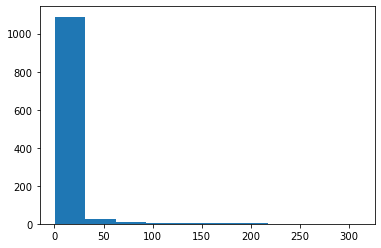

In [48]:
#Create a histogram of the Miles
plt.hist(inp1['MILES*'])
plt.show()

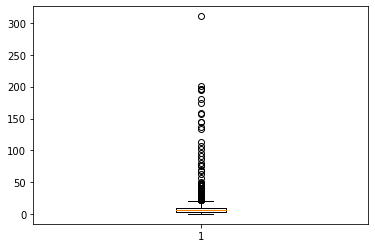

In [50]:
#Create a box plot for the Miles column
plt.boxplot(inp1['MILES*'])
plt.show()

## Bivariate Analysis

C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


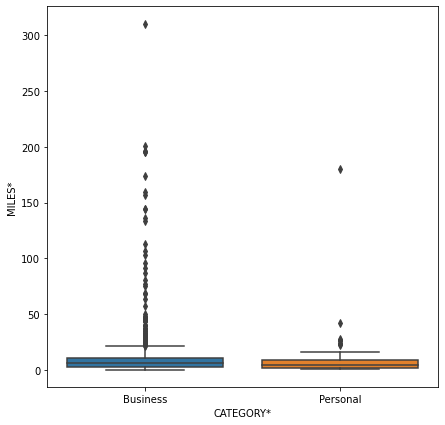

In [51]:
#Plot For Category Vs Numeric C->N
#Plot a side by side box Plot : Boxplot of Category Vs Miles
plt.figure(figsize=[7,7])
sns.boxplot(inp1['CATEGORY*'],inp1['MILES*'])
plt.show()

## Bar Plot

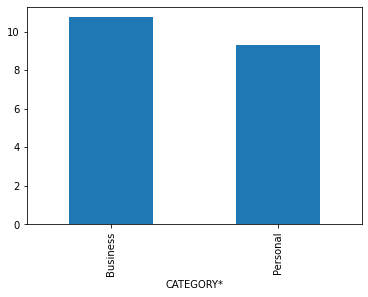

In [52]:
#Plot For Category Vs Numeric C->N
inp1.groupby(['CATEGORY*'])['MILES*'].mean().plot.bar()
plt.show()

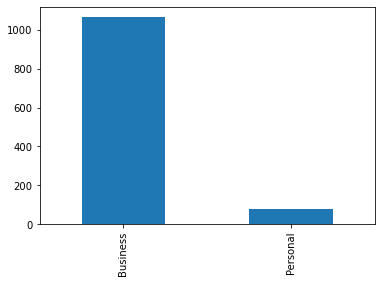

In [53]:
#Plot the CATEGORY column in Bar Plot
inp1['CATEGORY*'].value_counts().plot.bar()
plt.show()

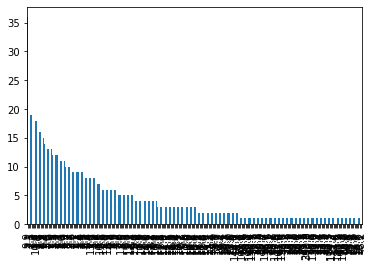

In [56]:
#plot the MILES column in Bar Plot
inp1['MILES*'].value_counts().plot.bar()
plt.show()

# Scatter Plot

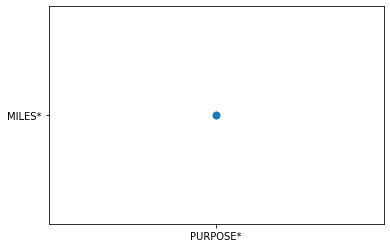

In [57]:
#Plot For Category Vs Numeric C->N
#Plot the Scatter Plot of Purpose & Miles
plt.scatter('PURPOSE*','MILES*', alpha = 1, s=50)

# Line Plot

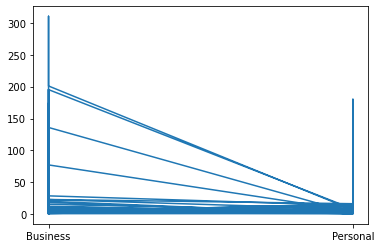

In [58]:
#plot the Category & Miles columns in Line Plot
plt.plot(inp1['CATEGORY*'] ,inp1['MILES*'])
plt.show()

## Multi-Variate Analysis`

C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


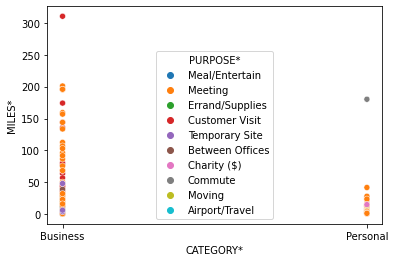

In [59]:
#Plot the Sctterplot in Category & Miles
sns.scatterplot(inp1['CATEGORY*'], inp1['MILES*'] , hue=inp1['PURPOSE*'])
plt.show()

# Heat Map

In [61]:
##Store the pivot table in a separate variable
res = pd.pivot_table(data=inp1,index="PURPOSE*",columns="CATEGORY*",values="MILES*",aggfunc=lambda x: np.quantile(x,0.2))


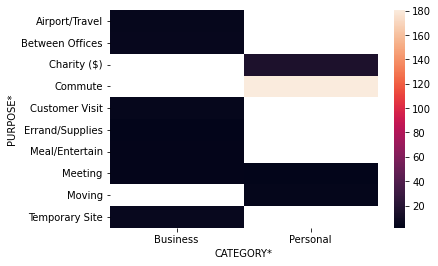

In [62]:
##Plot a heat map
sns.heatmap(res)
plt.show()

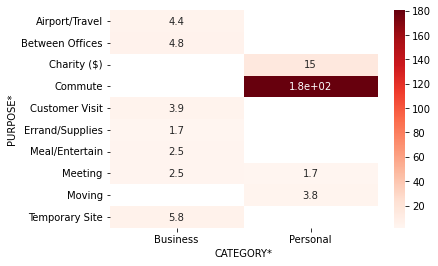

In [63]:
##Apply customisations
sns.heatmap(res, cmap = "Reds", annot=True)
plt.show()